# Nama: Muhammad Rizki Fauzaan
# Nim: 09011381722096 
# SK5 Palembang ( Kecerdasan Buatan )
Sebuah Rumah Sakit ingin mengevaluasi kinerja perawat yang telah bekerja selama lebih dari 1 tahun. Dalam evaluasi ini, perawat di survei berdasarkan Sopan Santun dan Pekerjaan nya selama bekerja dirumah sakit tersebut. Setiap perawat yang dievaluasi akan mendapatkan bonus gaji (hasil bonus gaji berupa bentuk % dari gaji yang diterima biasanya). Metode yang digunakan untuk mengevaluasi perawat tersebut adalah dengan menggunakan Metode Fuzzy Mamdani.

Sebelum memulai menghitung dan mengevaluasi perawat, hal yang pertama dilakukan adalah mendeklarasikan beberapa fungsi yang akan digunakan dalam Python

1. skfuzzy (sci-kit fuzzy) adalah operasi aritmatika untuk mencari nilai tengah atau nilai terbaik dari suatu perhitungan
2. matplotlib.pyplot adalah command line untuk menampilkan gambar atau grafik dari suatu coding/perhitungan dalam cell python

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt

# Fuzzifikasi
Terdapat 2 data untuk evaluasi kinerja perawat:
1. Sopan Santun (Penilaian dari 0 - 100) = Input
2. Pekerjaan (Penilaian dari 0 - 100) = Input

Terdapat 1 data untuk hasil evaluasi kinerja perawat:
1. Bonus Gaji (Penilaian dari 0 - 100) = Output

Dari pembagian data tersebut, kita mulai coding dibawah ini untuk membuat program sesuai pembagian fuzzifikasi diatas 

In [2]:
# Arange dalam penilaian, dimulai dari 0 sampai 100 dengan jarak 0.5 pada setiap nilai (misalnya 1, 1.5, 2, 2.5, dan seterusnya)
sopansantun = ctrl.Antecedent(np.arange(0, 100, 0.5), 'sopan santun') #Input
pekerjaan = ctrl.Antecedent(np.arange(0, 100, 0.5), 'pekerjaan') #Input
bonus = ctrl.Consequent(np.arange(0, 100, 0.5), 'bonus') #Output

# Fungsi Keanggotaan
Terdapat 3 fungsi keanggotaan dari setiap fuzzifikasi input(Sopan Santun dan Pekerjaan), yaitu:
1. Tidak Baik  (Nilai = 0 - 50)
2. Baik        (Nilai = 25 - 75)
3. Sangat Baik (Nilai = 50 - 100)

\begin{equation}
  SopanSantun['tidak baik'] = \mu TidakBaik(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  SopanSantun['baik'] = \mu Baik(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  SopanSantun['sangat baik'] = \mu SangatBaik(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation} 

\begin{equation}
  Pekerjaan['tidak baik'] = \mu TidakBaik(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  Pekerjaan['baik'] = \mu Baik(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  Pekerjaan['sangat baik'] = \mu SangatBaik(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation}  

Sedangkan fungsi keanggotaan dari fuzzifikasi output (Bonus Gaji), yaitu:

\begin{equation}
  Bonus['sedikit'] = \mu Sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  Bonus['rata-rata'] = \mu Rata-Rata(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  Bonus['banyak'] = \mu Banyak(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation} 

Berikut bentuk coding dari persamaan diatas

In [3]:
#Range untuk setiap fungsi keanggotaan
sopansantun['tidak baik'] = fuzz.trapmf(sopansantun.universe, [0, 0, 25, 50 ])
sopansantun['baik'] = fuzz.trimf(sopansantun.universe, [25, 50, 75]) 
sopansantun['sangat baik'] = fuzz.trapmf(sopansantun.universe, [50, 75, 100, 100])

pekerjaan['tidak baik'] = fuzz.trapmf(pekerjaan.universe, [0, 0, 25, 50 ]) 
pekerjaan['baik'] = fuzz.trimf(pekerjaan.universe, [25, 50, 75]) 
pekerjaan['sangat baik'] = fuzz.trapmf(pekerjaan.universe, [50, 75, 100, 100]) 

bonus['sedikit'] = fuzz.trapmf(bonus.universe, [0, 0, 25, 50 ]) 
bonus['ratarata'] = fuzz.trimf(bonus.universe, [25, 50, 75]) 
bonus['banyak'] = fuzz.trapmf(bonus.universe, [50, 75, 100, 100]) 

# Plotting Fungsi Keanggotaan
Dibawah ini kita membuat arange untuk menentukan plotting setiap fungsi keanggotaan dimulai dari Sopan Santun, Pekerjaan, dan Bonus

In [4]:
#Untuk Plotting
sopansantun_x = np.arange(0, 100, 0.5) 
pekerjaan_x = np.arange(0, 100, 0.5)
bonus_x = np.arange(0, 100, 0.5)

# Plotting Fungsi Keanggotaan Sopan Santun
Plot untuk keanggotaan $\mu sopansantun(x) $

\begin{equation}
  SopanSantun['tidak baik'] = \mu TidakBaik(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  SopanSantun['baik'] = \mu Baik(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  SopanSantun['sangat baik'] = \mu SangatBaik(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation} 


Text(0.5,1,'Sopan Santun Sangat Baik')

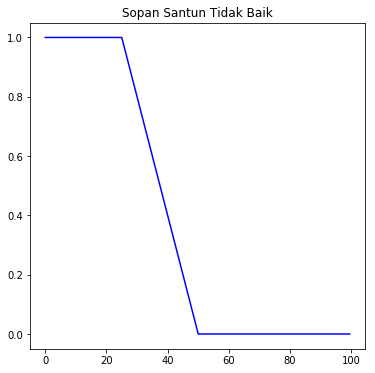

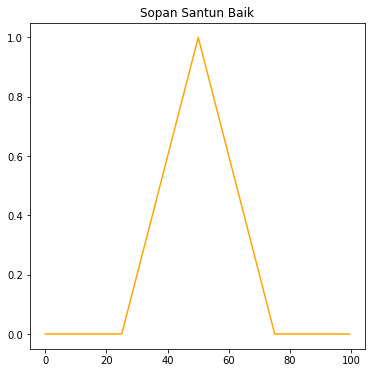

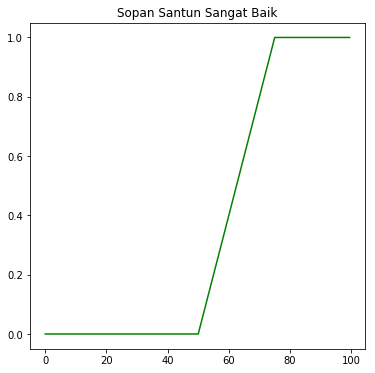

In [5]:
#Plotting untuk setiap fungsi keanggotaan
sopansantun_tidakbaik = fuzz.trapmf(sopansantun_x,[0,0,25,50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(sopansantun_x,sopansantun_tidakbaik,'blue')
ax0.set_title('Sopan Santun Tidak Baik')

sopansantun_baik = fuzz.trimf(sopansantun_x,[25,50,75])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(sopansantun_x,sopansantun_baik,'orange')
ax1.set_title('Sopan Santun Baik')

sopansantun_sangatbaik = fuzz.trapmf(sopansantun_x,[50,75,100,100])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(sopansantun_x,sopansantun_sangatbaik,'green')
ax2.set_title('Sopan Santun Sangat Baik')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


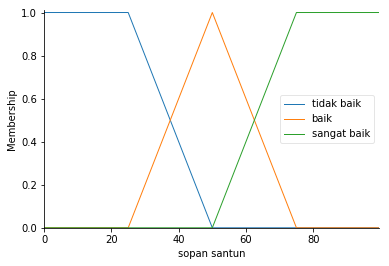

In [6]:
sopansantun.view()

# Plotting Fungsi Keanggotaan Pekerjaan
Plot untuk keanggotaan $\mu pekerjaan(x) $

\begin{equation}
  Pekerjaan['tidak baik'] = \mu TidakBaik(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  Pekerjaan['baik'] = \mu Baik(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  Pekerjaan['sangat baik'] = \mu SangatBaik(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation}  

Text(0.5,1,'Pekerjaan Sangat Baik')

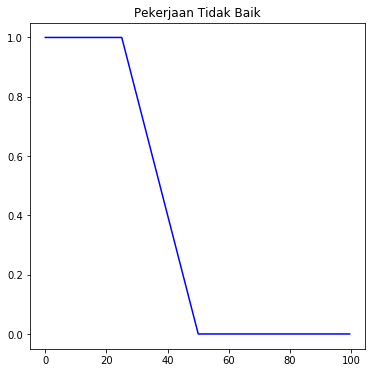

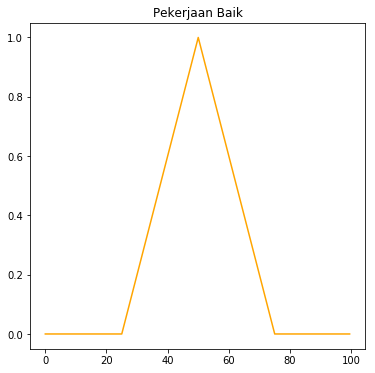

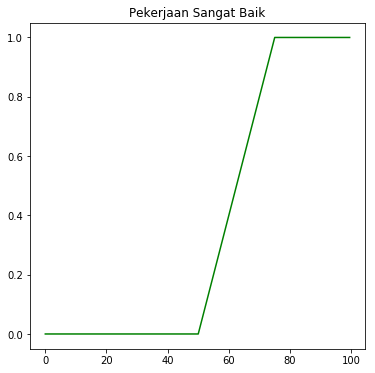

In [7]:
#Plotting untuk setiap fungsi keanggotaan
pekerjaan_tidakbaik = fuzz.trapmf(pekerjaan_x,[0,0,25,50])
fig4, (ax3) = plt.subplots(nrows=1,figsize=(6,6))
ax3.plot(pekerjaan_x,pekerjaan_tidakbaik,'blue')
ax3.set_title('Pekerjaan Tidak Baik')

pekerjaan_baik = fuzz.trimf(pekerjaan_x,[25,50,75])
fig5, (ax4) = plt.subplots(nrows=1,figsize=(6,6))
ax4.plot(pekerjaan_x,pekerjaan_baik,'orange')
ax4.set_title('Pekerjaan Baik')

pekerjaan_sangatbaik = fuzz.trapmf(pekerjaan_x,[50,75,100,100])
fig6, (ax5) = plt.subplots(nrows=1,figsize=(6,6))
ax5.plot(sopansantun_x,pekerjaan_sangatbaik,'green')
ax5.set_title('Pekerjaan Sangat Baik')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


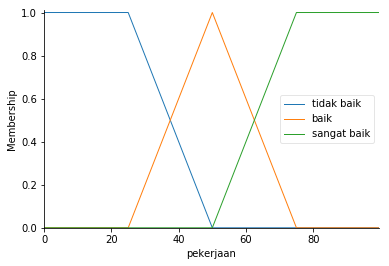

In [8]:
pekerjaan.view()

# Plotting Fungsi Keanggotaan Bonus
Plot untuk keanggotaan $\mu bonus(x) $

\begin{equation}
  Bonus['sedikit'] = \mu Sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  Bonus['rata-rata'] = \mu Rata-Rata(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  Bonus['banyak'] = \mu Banyak(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation} 

Text(0.5,1,'Bonus Banyak')

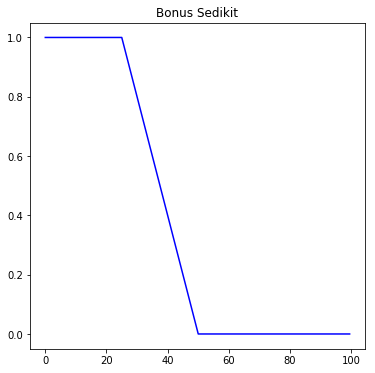

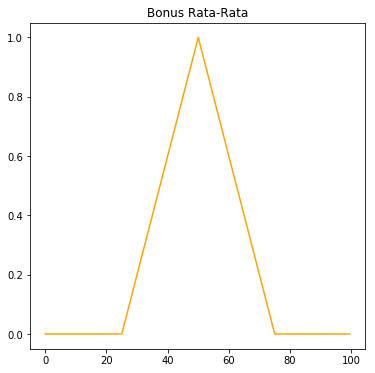

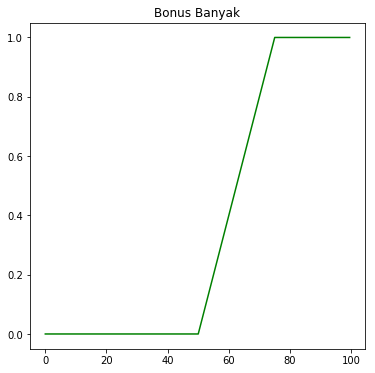

In [9]:
#Plotting
bonus_sedikit = fuzz.trapmf(bonus_x,[0,0,25,50])
fig7, (ax6) = plt.subplots(nrows=1,figsize=(6,6))
ax6.plot(bonus_x,bonus_sedikit,'blue')
ax6.set_title('Bonus Sedikit')

bonus_ratarata = fuzz.trimf(bonus_x,[25,50,75])
fig8, (ax7) = plt.subplots(nrows=1,figsize=(6,6))
ax7.plot(bonus_x,bonus_ratarata,'orange')
ax7.set_title('Bonus Rata-Rata')

bonus_banyak = fuzz.trapmf(bonus_x,[50,75,100,100])
fig9, (ax8) = plt.subplots(nrows=1,figsize=(6,6))
ax8.plot(bonus_x,bonus_banyak,'green')
ax8.set_title('Bonus Banyak')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


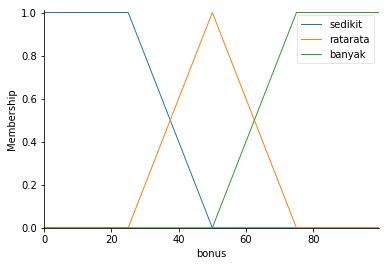

In [10]:
bonus.view()

# Inferensi
Tahap Inferensi akan membuat aturan fuzzy yang bisa dinyatakan dalam bentuk IF ... AND ... THEN ...

Berdasarkan jumlah fuzzifikasi dari variable sopan santun yang berjumlah 3 dan fuzzifikasi dari variabel pekerjaan yang berjumlah 3, maka terdapat 9 buah rule yang akan digunakan (3 pangkat 2)(3x3=9)
1. IF (Sopan Santun Tidak Baik) AND (Pekerjaan Tidak Baik), THEN (Bonus Sedikit)
2. IF (Sopan Santun Tidak Baik) AND (Pekerjaan Baik), THEN (Bonus Sedikit)
3. IF (Sopan Santun Tidak Baik) AND (Pekerjaan Sangat Baik), THEN (Bonus Rata-Rata)
4. IF (Sopan Santun Baik) AND (Pekerjaan Tidak Baik), THEN (Bonus Sedikit)
5. IF (Sopan Santun Baik) AND (Pekerjaan Baik), THEN (Bonus Rata-Rata)
6. IF (Sopan Santun Baik) AND (Pekerjaan Sangat Baik), THEN (Bonus Banyak)
7. IF (Sopan Santun Sangat Baik) AND (Pekerjaan Tidak Baik), THEN (Bonus Rata-Rata)
8. IF (Sopan Santun Sangat Baik) AND (Pekerjaan Baik), THEN (Bonus Banyak)
9. IF (Sopan Santun Sangat Baik) AND (Pekerjaan Sangat Baik), THEN (Bonus Banyak)

|Rule|Sopan Santun|Pekerjaan|Bonus|
|----|------------|---------|-----|
|Rule1|Tidak Baik|Tidak Baik|Sedikit|
|Rule2|Tidak Baik|Baik|Sedikit|
|Rule3|Tidak Baik|Sangat Baik|Rata-Rata|
|Rule4|Baik|Tidak Baik|Sedikit|
|Rule5|Baik|Baik|Rata-Rata|
|Rule6|Baik|Sangat Baik|Banyak|
|Rule7|Sangat Baik|Tidak Baik|Rata-Rata|
|Rule8|Sangat Baik|Baik|Banyak|
|Rule9|Sangat Baik|Sangat Baik|Banyak|

Dibawah ini merupakan codingan dari pembagian rule diatas

In [11]:
rule1 = ctrl.Rule(sopansantun['tidak baik'] & pekerjaan ['tidak baik'], bonus ['sedikit'])
rule2 = ctrl.Rule(sopansantun['tidak baik'] & pekerjaan ['baik'], bonus ['sedikit'])
rule3 = ctrl.Rule(sopansantun['tidak baik'] & pekerjaan ['sangat baik'], bonus ['ratarata'])

rule4 = ctrl.Rule(sopansantun['baik'] & pekerjaan ['tidak baik'], bonus ['sedikit'])
rule5 = ctrl.Rule(sopansantun['baik'] & pekerjaan ['baik'], bonus ['ratarata'])
rule6 = ctrl.Rule(sopansantun['baik'] & pekerjaan ['sangat baik'], bonus ['banyak'])

rule7 = ctrl.Rule(sopansantun['sangat baik'] & pekerjaan ['tidak baik'], bonus ['ratarata'])
rule8 = ctrl.Rule(sopansantun['sangat baik'] & pekerjaan ['baik'], bonus ['banyak'])
rule9 = ctrl.Rule(sopansantun['sangat baik'] & pekerjaan ['sangat baik'], bonus ['banyak'])

# Rule Evaluation

In [12]:
Nilai_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Defuzzifikasi

47.14165428429912


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


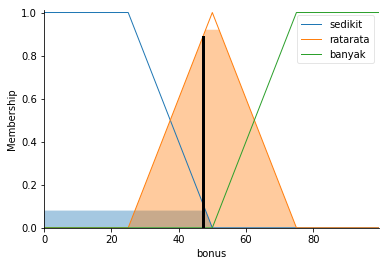

In [13]:
Nilai = ctrl.ControlSystemSimulation(Nilai_ctrl)

#Masukkan input penilaian Sopan Santun 49
Nilai.input['sopan santun'] = 49

#Masukkan input penilaian Pekerjaan 48
Nilai.input['pekerjaan'] = 48

#Melakukan perhitungan Defuzzifikasi
Nilai.compute()

#Hasil atau Output dari Defuzzifikasi
print(Nilai.output['bonus'])

#Tampilkan dalam bentuk plot
bonus.view(sim=Nilai)

Hasil dari perhitungan program dengan menggunakan Fuzzy Mamdani adalah perawat tersebut mendapatkan bonus gaji sebesar 47.1%

# Perhitungan Manual

\begin{equation}
    Sopan Santun = 49 \\
  Sopan Santun['tidak baik'] = \mu TidakBaik(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \checkmark \\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  Sopan Santun['baik'] = \mu Baik(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.\\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \checkmark \\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  Sopan Santun['sanagt baik'] = \mu SangatBaik(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation}

\begin{equation}
    \mu TidakBaik(49) = (50 - 49) / (50 - 25) \\
    \mu TidakBaik(49) = 1/25 \\ 
    \mu TidakBaik(49) = 0.04 \\
    \mu Baik(49) = (49 - 25) / (50-25) \\
    \mu Baik(49) = 24/25 \\
    \mu Baik(49) = 0.96 \\
\end{equation}

=========================================================================================================================

\begin{equation}
    Pekerjaan = 48 \\
   Pekerjaan['tidak baik'] = \mu TidakBaik(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \checkmark \\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
  Pekerjaan['baik'] = \mu Baik(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.\\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \checkmark \\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
  Pekerjaan['sangat baik'] = \mu SangatBaik(x)=\begin{cases}
    0, & \text{$50\leq x\leq75$}.\\
    (100 - x)/(100 - 75) , & \text{$75 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation}

\begin{equation}
    \mu TidakBaik(48) = (50 - 48) / (50 - 25) \\
    \mu TidakBaik(48) = 2/25 \\ 
    \mu TidakBaik(48) = 0.08 \\
    \mu Baik(48) = (48 - 25) / (50-25) \\
    \mu Baik(48) = 23/25 \\
    \mu Baik(48) = 0.92 \\
\end{equation}

=========================================================================================================================

\begin{equation}
    Sopan Santun \\
    \mu TidakBaik(49) = 0.04 \\
    \mu Baik(49) = 0.96 \\
\end{equation}

\begin{equation}
    Pekerjaan \\
    \mu TidakBaik(48) = 0.08 \\
    \mu Baik(48) = 0.92 \\
\end{equation}

# Mencari Nilai Z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

IF Sopansantun Tidakbaik AND Pekerjaan TidakBaik THEN Bonus Sedikit
- = MIN ( µSopanSantunTidakbaik & µPekerjaanTidakbaik)
  = MIN ( 0.04 & 0.08 )
  = 0.04

\begin{equation}
  Bonus['sedikit'] = \mu Sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
\end{equation}
\\
 $$(50- x) / (50 - 25) = 0.04 $$
 $$ 50 - x = 0.04 \times 25 $$
 $$ - x = 1 - 50 $$
 $$ - x = -49 $$
 $$ x = 49 $$
 
$$ Z1 = 49 $$

IF Sopansantun Tidakbaik AND Pekerjaan Baik THEN Bonus Sedikit
- = MIN ( µSopanSantunTidakbaik & µPekerjaanBaik)
  = MIN ( 0.04 & 0.92 )
  = 0.04

\begin{equation}
  Bonus['sedikit'] = \mu Sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
\end{equation}
\\
 $$(50- x) / (50 - 25) = 0.04 $$
 $$ 50 - x = 0.04 \times 25 $$
 $$ - x = 1 - 50 $$
 $$ - x = -49 $$
 $$ x = 49 $$
 
$$ Z2 = 49 $$
 
IF Sopansantun Tidakbaik AND Pekerjaan SangatBaik THEN Bonus Rata - Rata
- = MIN ( µSopanSantunTidakbaik & µPekerjaanSangatBaik)
  = MIN ( 0.04 & 0 )
  = 0
$$ Z3 = 0 $$

IF Sopansantun Baik AND Pekerjaan TidakBaik THEN Bonus Sedikit
- = MIN ( µSopanSantunBaik & µPekerjaanTidakbaik)
  = MIN ( 0.96 & 0.08 )
  = 0.08

\begin{equation}
  Bonus['sedikit'] = \mu Sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}. \\
    0, & \text{$x\geq 50 $ }.
  \end{cases}
  \\
\end{equation}
\\
 $$(50- x) / (50 - 25) = 0.08 $$
 $$ 50 - x = 0.08 \times 25 $$
 $$ - x = 2 - 50 $$
 $$ - x = -48 $$
 $$ x = 48 $$
 
$$ Z4 = 48 $$

IF Sopansantun Baik AND Pekerjaan Baik THEN Bonus Rata - Rata
- = MIN ( µSopanSantunBaik & µPekerjaanbaik)
  = MIN ( 0.96 & 0.92 )
  = 0.92
  
\begin{equation}
  Bonus['ratarata'] = \mu Rata-Rata(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq75$}.  \\
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
  \end{cases}
  \\
\end{equation}
\\
 $$(x - 25) / (50 - 25) = 0.92 $$
 $$ x - 25 = 0.92 \times 25 $$
 $$ x - 25 = 23 $$
 $$ x = 48 $$
 
 $$ (75 - x) / (75 -50) = 0.92 $$
 $$ (75 - x) = 23 $$
 $$ - x = - 52 $$
 $$ x = 52 $$
 
$$ Z5 = 48 $$

IF Sopansantun Baik AND Pekerjaan SangatBaik THEN Bonus Banyak
- = MIN ( µSopanSantunBaik & µPekerjaanSangatBaik)
  = MIN ( 0.96 & 0 )
  = 0
$$ Z6 = 0 $$

IF Sopansantun SangatBaik AND Pekerjaan TidakBaik THEN Bonus Rata-Rata
- = MIN ( µSopanSantunSangatBaik & µPekerjaanTidakBaik)
  = MIN ( 0 & 0.08 )
  = 0.
$$ Z7 = 0 $$

IF Sopansantun SangatBaik AND Pekerjaan Baik THEN Bonus Banyak
- = MIN ( µSopanSantunSangatBaik & µPekerjaanBaik)
  = MIN ( 0 & 0.92 )
  = 0
$$ Z8 = 0 $$

IF Sopansantun SangatBaik AND Pekerjaan SangatBaik THEN Bonus Banyak
- = MIN ( µSopanSantunSangatBaik & µPekerjaanSangatBaik)
  = MIN ( 0 & 0 )
  = 0
$$ Z9 = 0 $$  

=========================================================================================================================

Dari nilai diatas, kita dapat mencari Nilai Z, yaitu

$$Z = \frac{0.04 \times 49 + 0.04 \times 49 + 0 + 0.08 \times 48 + 0.92 \times 48 + 0 + 0 + 0 + 0}{0.04 + 0.04 + 0 + 0.08 + 0.92 + 0 + 0 + 0 + 0} $$
 
 $$ Z = \frac{1.96 + 1.96 + 0 + 3.48 + 44.16 + 0 + 0 + 0 + 0}{1.08} $$
 $$ Z = \frac{51.56}{1.08} $$
 $$ Z = 47.74074 $$

Hasil Output dengan menggunakan program adalah sebesar 47,14165 sedangkan perhitungan manual sebesar 47,74074 . Terdapat Perbedaan sebesar 0,59909 dari kedua hasil tersebut. Dan error perbandingan dari nilai python dan manual adalah sebesar -4,714%. Kesimpulannya adalah Perawat tersebut akan mendapatkan bonus rata - rata sebesar kurang lebih dari 47%.

Dari hasil Penelitian tersebut maka Metode Fuzzy Logic Mamdani untuk Evaluasi Kinerja Perawat di rumah sakit mendapatkan hasil yang diinginkan dan Metode tersebut dapat digunakan untuk Evaluasi Kinerja Perawat

# Referensi
1. [Paper: Metode Fuzzy Logic Untuk Evaluasi Kinerja Pelayanan Perawat ( Studi Kasus : RSIA Siti Hawa Padang ) | Anas Aklani | Edik Informatika](http://ejournal.stkip-pgri-sumbar.ac.id/index.php/eDikInformatika/article/view/1478/807)
2. [Coding Fuzzy: xxvvanda Fuzzy-Logic-In-Indonesian via Github](https://github.com/xxvvanda/Fuzzy-Logic-In-Indonesian/blob/master/fuzzy%20original.py)